Kaggle LSTM:
https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

https://aqicn.org/data-platform/register/

Note: the daily AQI is based on the 24 hours average of hourly readings.

Ursynów, Warszawa, Mazowieckie past 85 months daily average AQI
Data Sources
Regional Inspectorate for Environmental Protection in Warsaw (Wojewódzki Inspektorat Ochrony Środowiska w Warszawie) - Główny inspektorat ochrony środowiska

In [1]:
import os

In [2]:
os.chdir("C:/Users/KonuTech/Downloads/deep-learning-LSTM-air-quality-Ursynow-at-Warsaw")

In [3]:
from functions import *

In [4]:
df = pd.read_csv("ursynów,-warszawa, mazowieckie-air-quality.csv", infer_datetime_format="True", parse_dates=["date"], index_col="date", delimiter=',')

In [5]:
df.columns = df.columns.str.strip()

In [6]:
cols = list(df.columns)
for i in range(len(cols)):
    df[cols[i]] = pd.to_numeric(df[cols[i]], errors='coerce')

In [7]:
df.sort_index(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2475 entries, 2013-12-31 to 2021-01-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    2432 non-null   float64
 1   pm10    2433 non-null   float64
 2   o3      2441 non-null   float64
 3   no2     2417 non-null   float64
 4   so2     1628 non-null   float64
 5   co      588 non-null    float64
dtypes: float64(6)
memory usage: 135.4 KB


In [9]:
df.describe()

,pm25,pm10,o3,no2,so2,co
count,2432.000,2433.000,2441.000,2417.000,1628.000,588.000
mean,62.799,25.111,24.838,9.423,2.994,4.446
std,28.816,12.229,11.927,5.505,2.109,2.733
min,11.000,3.000,1.000,1.000,1.000,1.000
25%,42.000,16.000,16.000,6.000,2.000,3.000
50%,56.500,23.000,24.000,8.000,2.000,4.000
75%,78.000,31.000,33.000,12.000,4.000,6.000
max,174.000,86.000,74.000,43.000,25.000,20.000


### Dealing with NULL values of series

In [10]:
df.isna().sum()

pm25      43
pm10      42
o3        34
no2       58
so2      847
co      1887
dtype: int64

In [11]:
df[df["pm25"].isna() == True]

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2013-12-31,nan,41.000,14.000,6.000,4.000,4.000
2014-05-31,nan,8.000,28.000,3.000,3.000,nan
2014-07-13,nan,13.000,43.000,5.000,2.000,4.000
2014-10-06,nan,28.000,28.000,6.000,3.000,4.000
2014-10-12,nan,25.000,22.000,9.000,1.000,nan
2014-11-01,nan,46.000,12.000,9.000,6.000,nan
2014-12-31,nan,27.000,16.000,4.000,2.000,8.000
2015-01-30,nan,22.000,13.000,10.000,5.000,6.000
2015-04-25,nan,17.000,27.000,9.000,2.000,nan


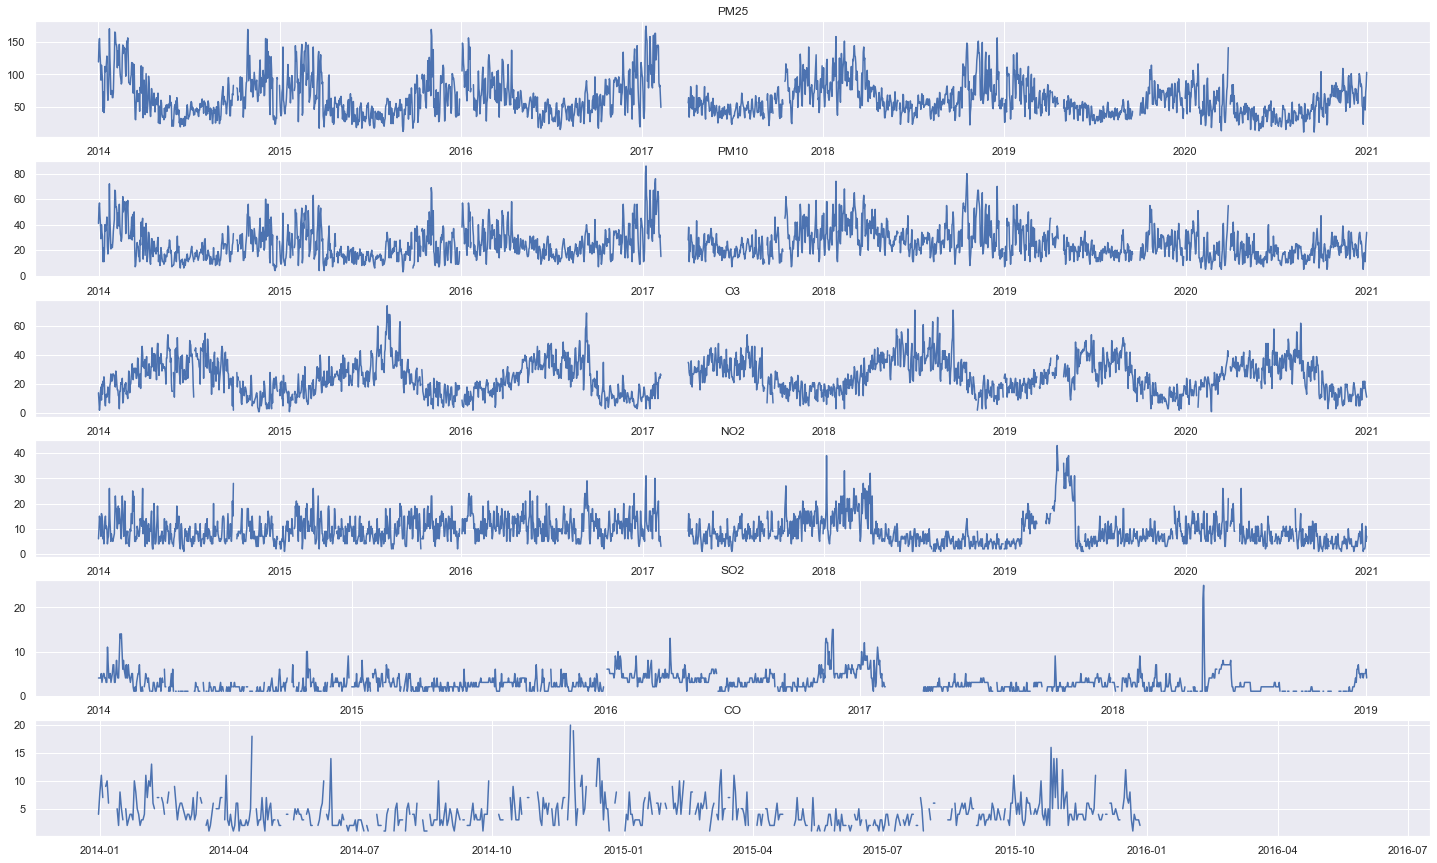

In [12]:
plt.figure(figsize=(25, 15))

cols = list(df.columns)
for i in range(len(cols)):
    plt.subplot(len(cols), 1, i+1)
    plt.title(cols[i].upper())
    plt.plot(df[cols[i]])

### Resampling for diffrent intervals & Interpolation of NULLs

methodstr, default ‘linear’
Interpolation technique to use. One of:

‘linear’: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.

‘time’: Works on daily and higher resolution data to interpolate given length of interval.

‘index’, ‘values’: use the actual numerical values of the index.

‘pad’: Fill in NaNs using existing values.

‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’: Wrappers around the SciPy interpolation methods of similar names. See Notes.

‘from_derivatives’: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.

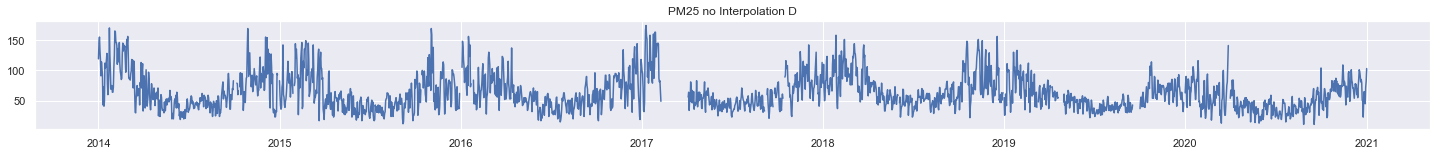

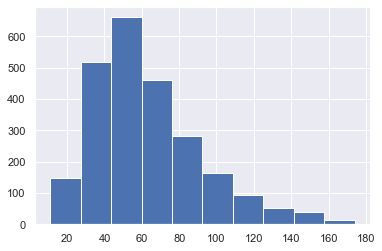

pm25
quadratic
W


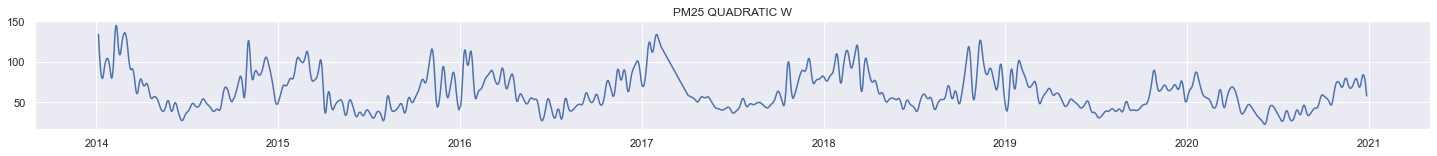

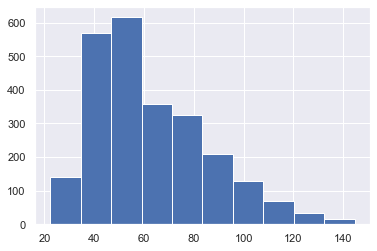

pm25
quadratic
M


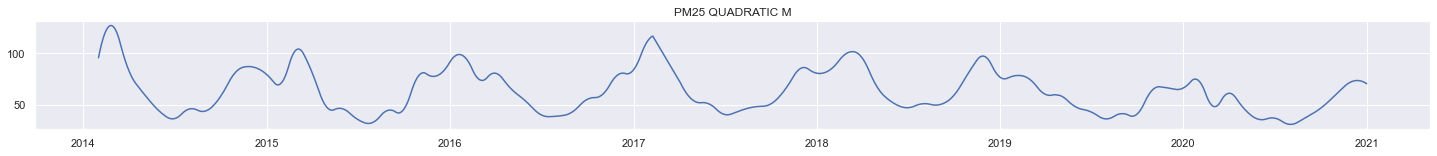

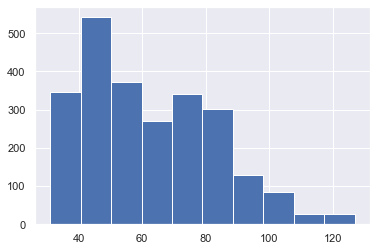

pm25
quadratic
Q


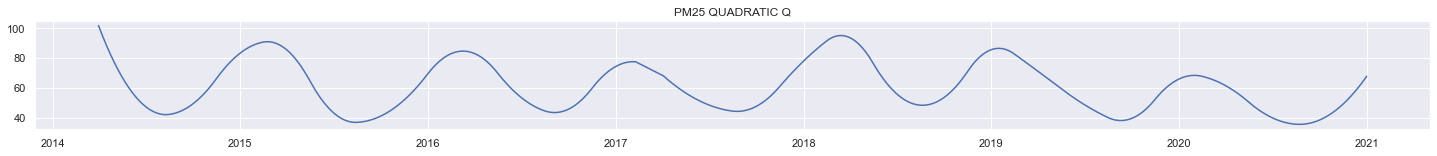

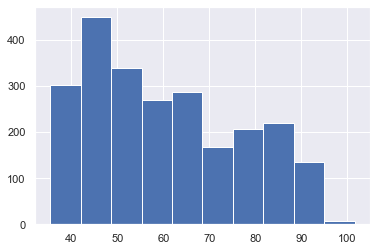

pm25
quadratic
Y


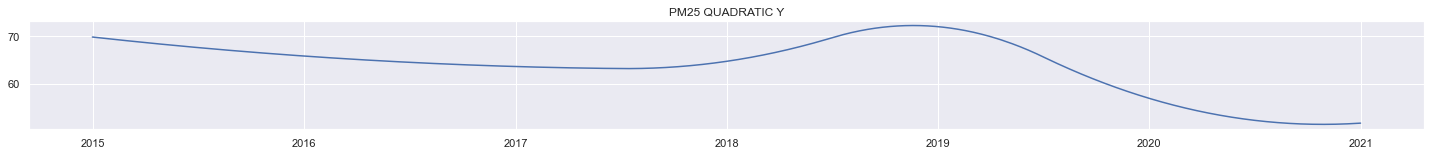

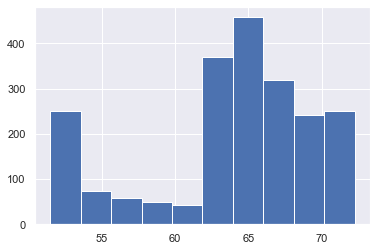

pm25
piecewise_polynomial
W


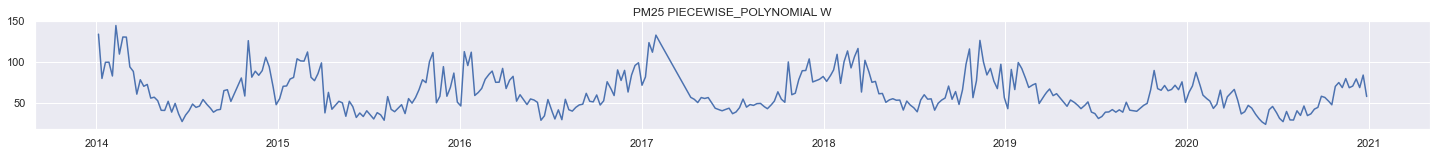

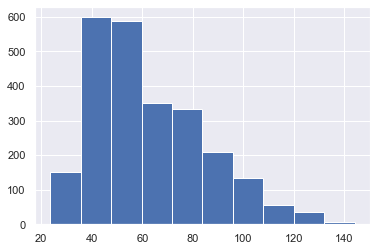

pm25
piecewise_polynomial
M


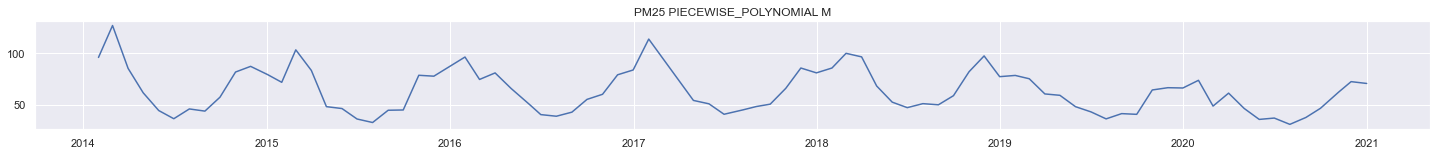

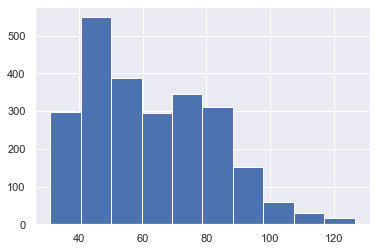

pm25
piecewise_polynomial
Q


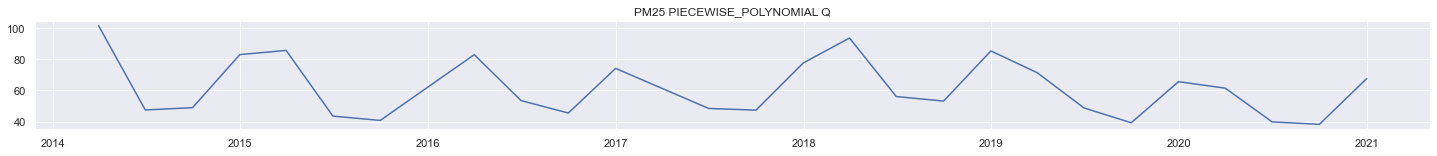

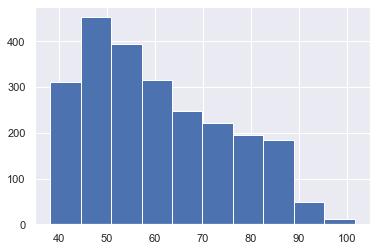

pm25
piecewise_polynomial
Y


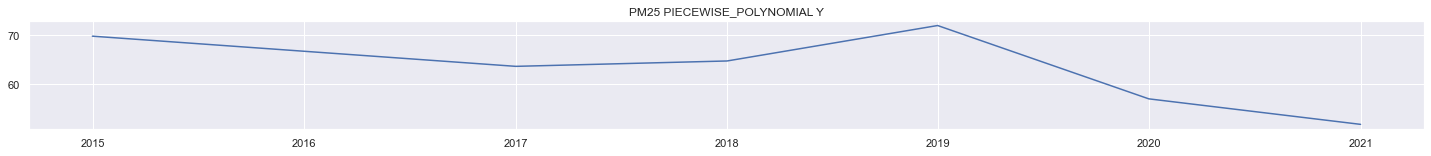

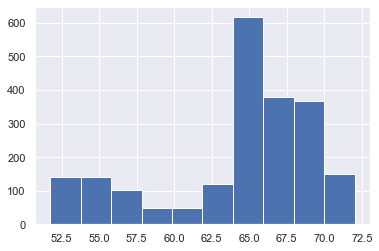

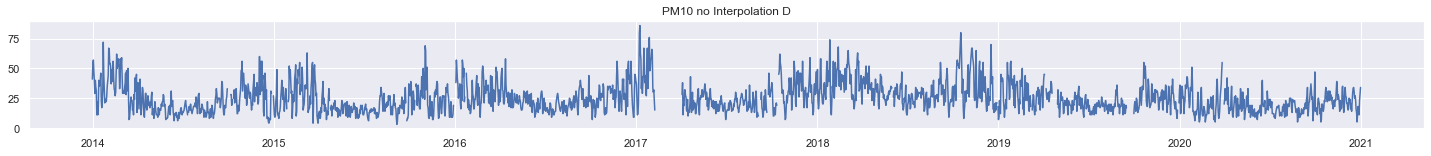

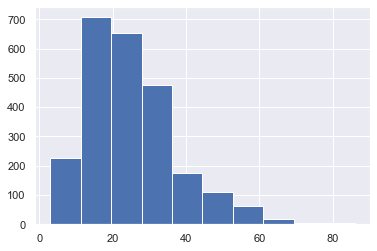

pm10
quadratic
W


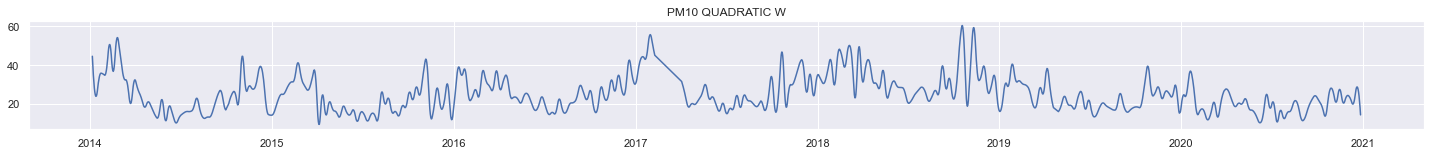

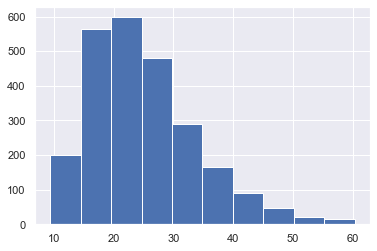

pm10
quadratic
M


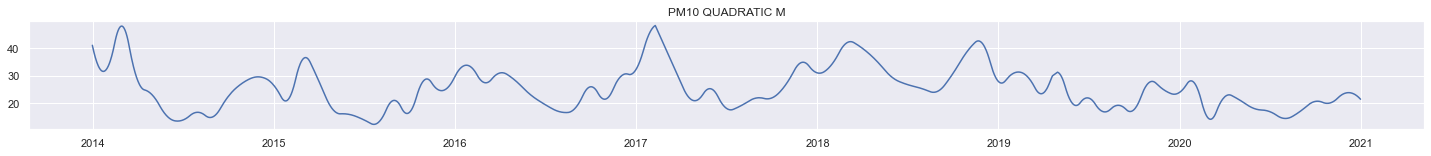

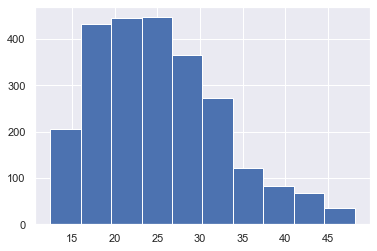

pm10
quadratic
Q


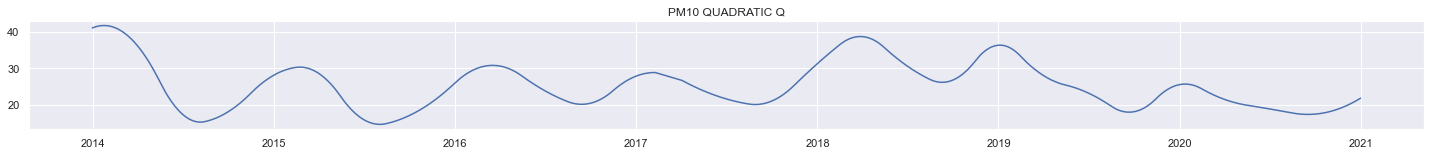

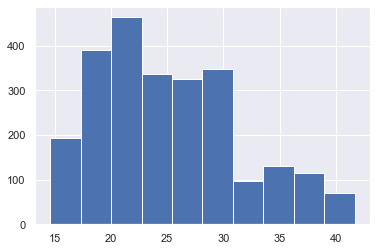

pm10
quadratic
Y


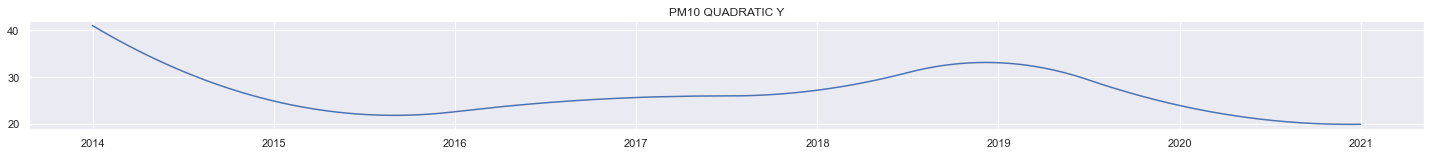

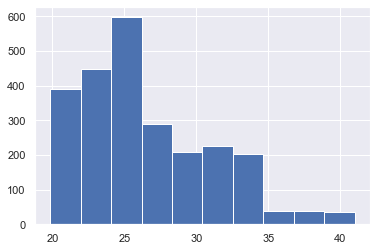

pm10
piecewise_polynomial
W


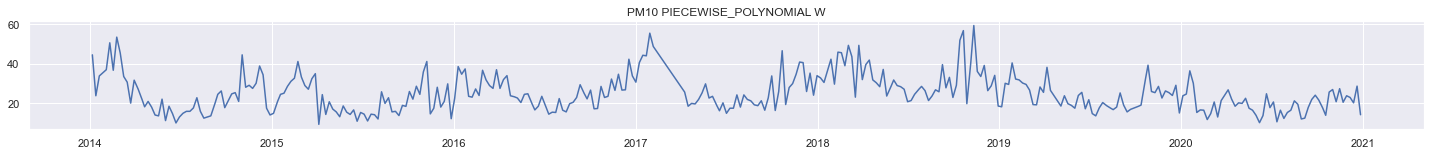

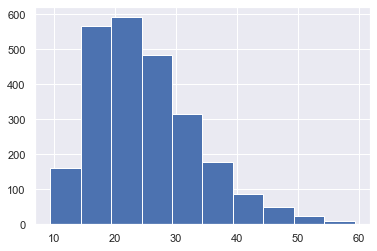

pm10
piecewise_polynomial
M


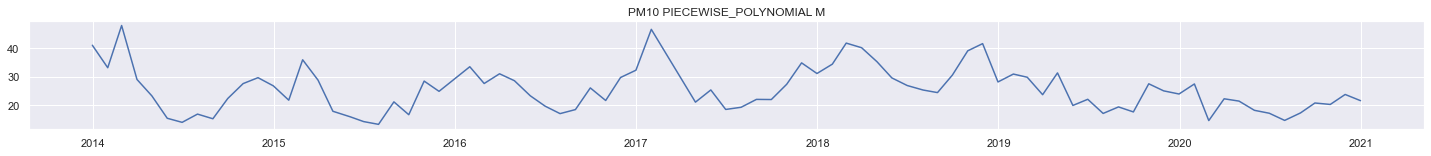

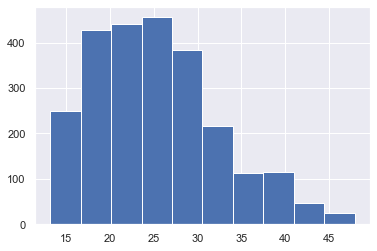

pm10
piecewise_polynomial
Q


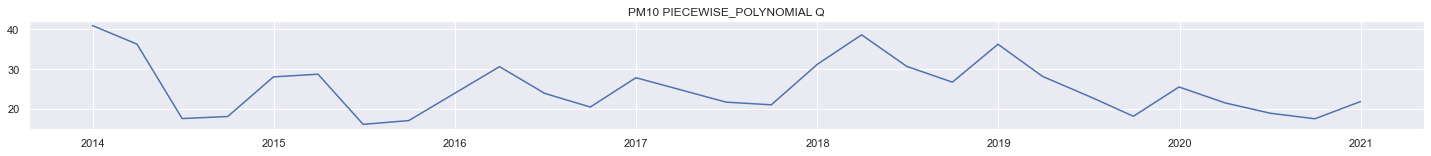

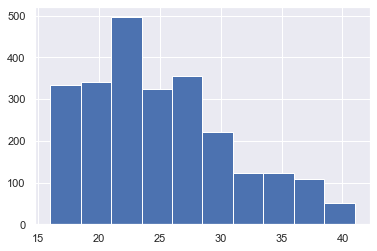

pm10
piecewise_polynomial
Y


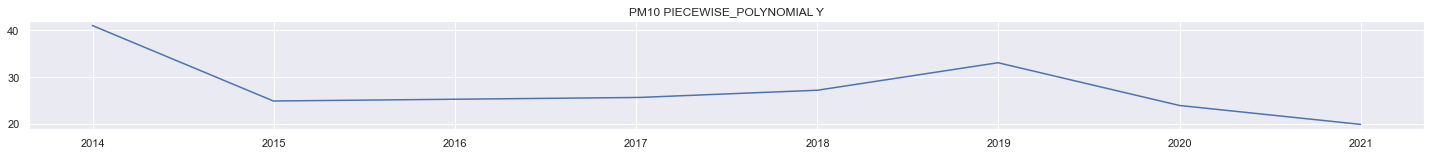

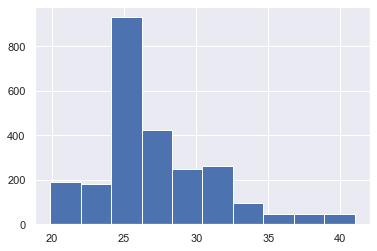

In [13]:
data = df.copy()
cols = list(data.columns)
cols = ["pm25", "pm10"]
#method = ["nearest", "zero", "slinear", "quadratic", "barycentric", "krogh", "piecewise_polynomial", "pchip", "akima", "cubicspline"]
method = ["quadratic", "piecewise_polynomial"]
sample = ["W", "M", "Q", "Y"]

for i in range(len(cols)):
    
    plt.figure(figsize=(25, 2))
    plt.title(cols[i].upper() + " no Interpolation" + " D")
    plt.plot(data[cols[i]])
    plt.show()
    plt.hist(data[cols[i]])
    plt.show()
    
    for j in range(len(method)):
        for k in range(len(sample)):
            
            data = df.copy()

            print(cols[i])
            print(method[j])
            print(sample[k])
                        
            data[cols[i]] = data[cols[i]].resample(sample[k]).mean()
            data[cols[i]] = data[cols[i]].interpolate(method=method[j])
            

            plt.figure(figsize=(25, 2))
            plt.title(cols[i].upper() + " " + method[j].upper() + " " + sample[k].upper())
            plt.plot(data[cols[i]])
            plt.show()
            plt.hist(data[cols[i]])
            plt.show()

In [14]:
df.loc['2017-10-13':'2017-10-15']

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2017-10-13,nan,nan,15.000,9.000,2.000,nan
2017-10-14,nan,nan,13.000,9.000,1.000,nan
2017-10-15,nan,45.000,18.000,18.000,2.000,nan


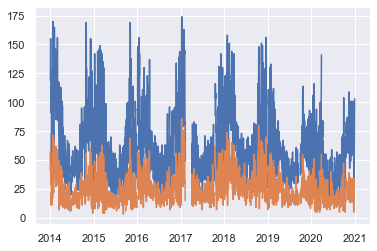

In [15]:
plt.plot(df[["pm25", "pm10"]])

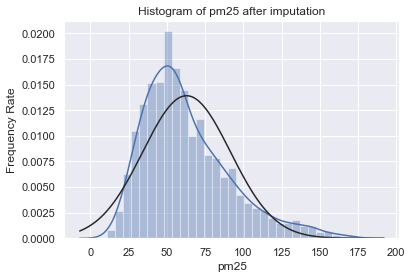

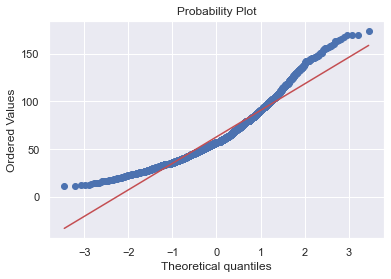

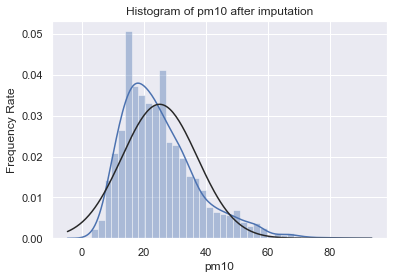

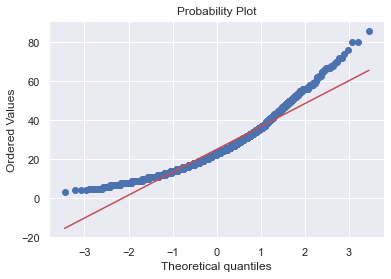

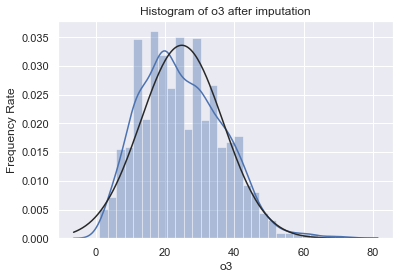

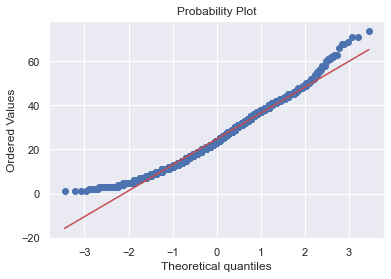

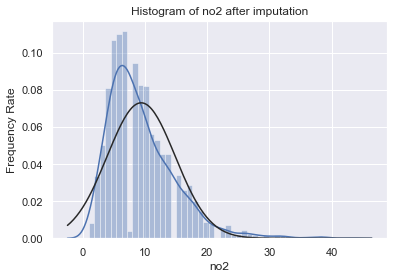

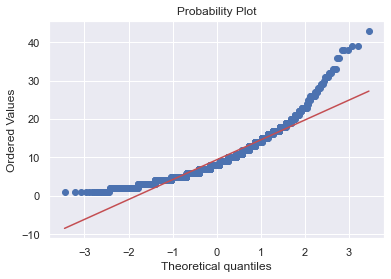

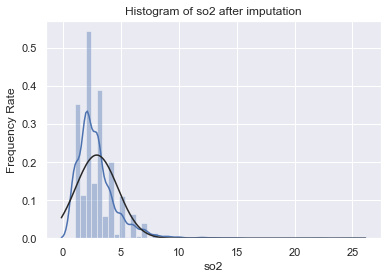

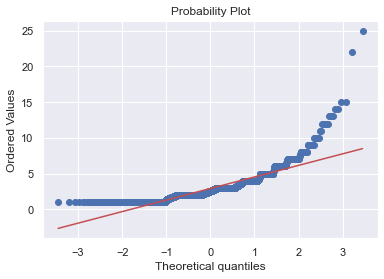

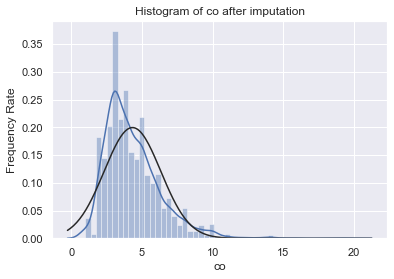

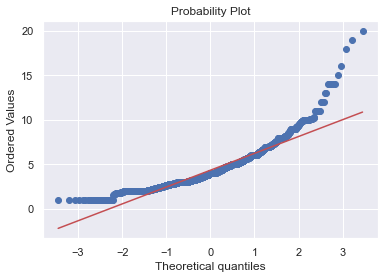

<Figure size 432x288 with 0 Axes>

In [16]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=df
                                                           ,variables=df.columns
                                                           ,target=None
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
#floats_without_nulls

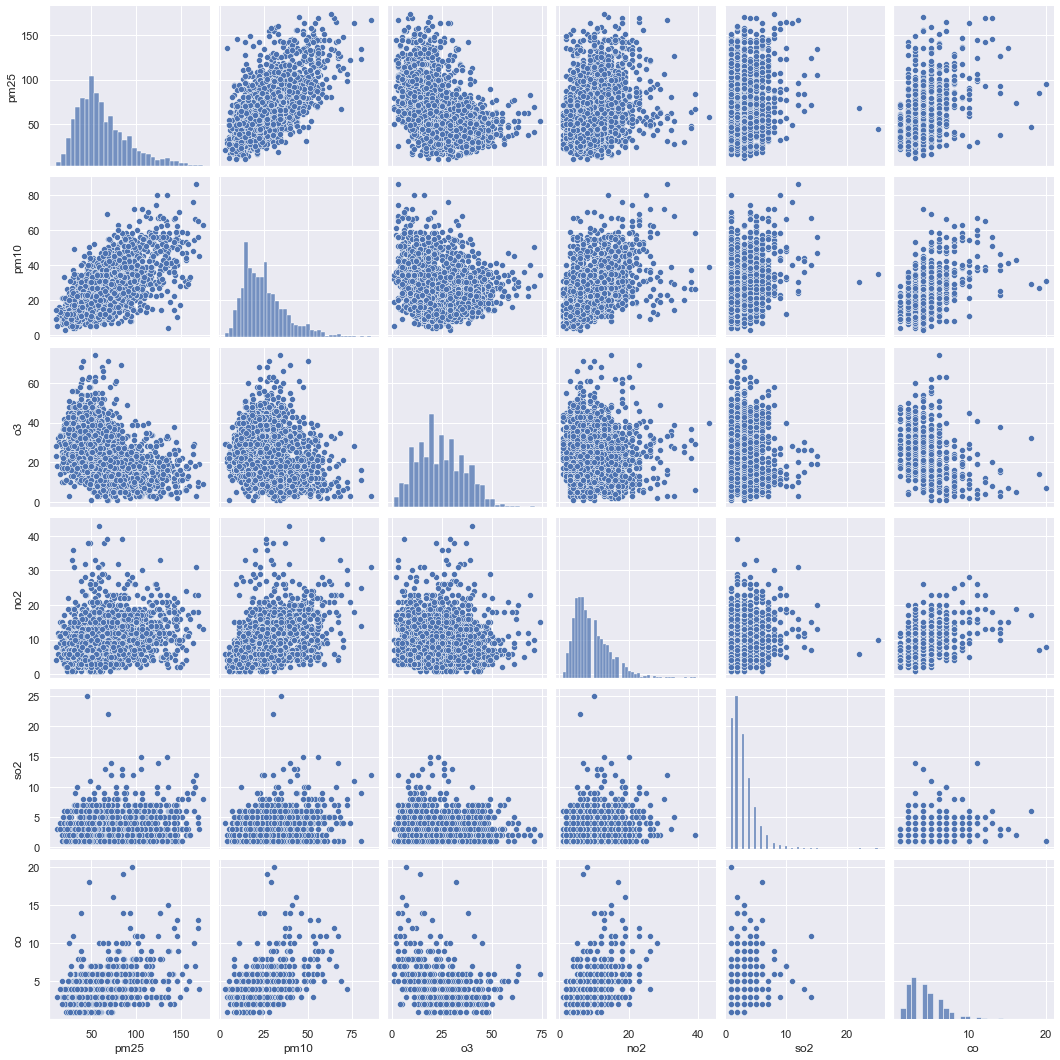

In [17]:
sns.pairplot(df)

In [18]:
# plt.subplots(figsize=(15,5))
# matrix = np.triu(df.corr())
# sns_plot = sns.heatmap(df.corr(), annot=True, mask=matrix)
# fig = sns_plot.get_figure()
# fig.savefig("ini_corr_matrix.jpg")
# plt.clf()

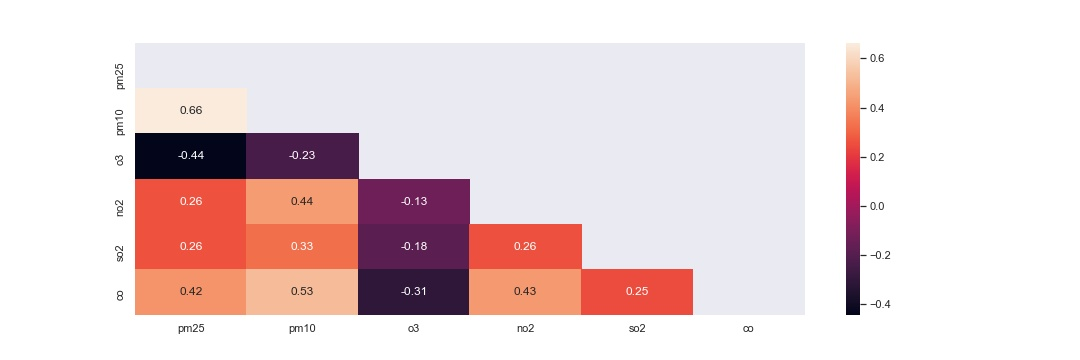

In [19]:
Image(filename='ini_corr_matrix.jpg')

# 3. Preprocessing

### Interpolation

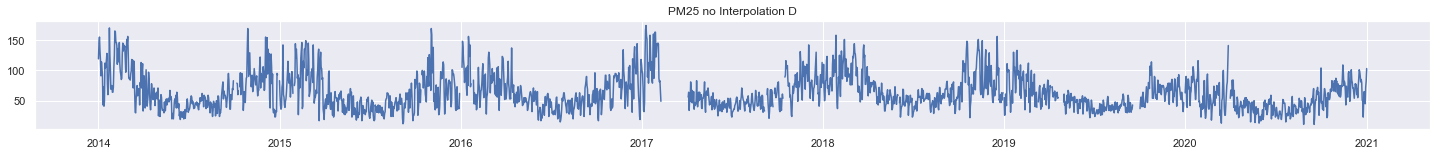

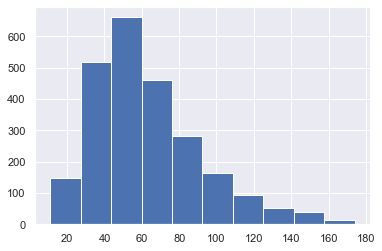

pm25
piecewise_polynomial
W


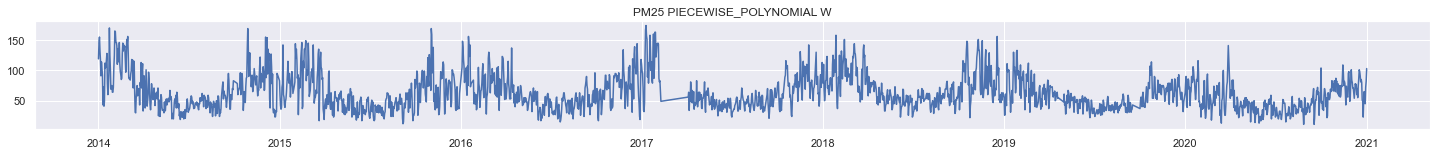

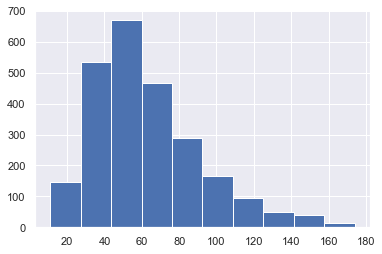

In [20]:
data = df.copy()
cols = list(data.columns)
cols = ["pm25"]
method = ["piecewise_polynomial"]
sample = ["W"]

for i in range(len(cols)):
    
    plt.figure(figsize=(25, 2))
    plt.title(cols[i].upper() + " no Interpolation" + " D")
    plt.plot(data[cols[i]])
    plt.show()
    plt.hist(data[cols[i]])
    plt.show()
    
    for j in range(len(method)):
        for k in range(len(sample)):
            
            data = df.copy()

            print(cols[i])
            print(method[j])
            print(sample[k])
            
            data[cols[i]] = data[cols[i]].interpolate(method=method[j])
            

            plt.figure(figsize=(25, 2))
            plt.title(cols[i].upper() + " " + method[j].upper() + " " + sample[k].upper())
            plt.plot(data[cols[i]])
            plt.show()
            plt.hist(data[cols[i]])
            plt.show()

In [21]:
data.shape[0]

2475

In [22]:
data = data[data["pm25"].isnull() == False]
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2014-01-01,119.000,53.000,8.000,10.000,4.000,8.000
2014-01-02,145.000,57.000,2.000,15.000,4.000,11.000
2014-01-03,155.000,47.000,6.000,13.000,4.000,7.000
2014-01-04,132.000,40.000,15.000,11.000,5.000,nan
2014-01-05,117.000,29.000,18.000,7.000,3.000,9.000
...,...,...,...,...,...,...
2020-12-28,50.000,11.000,18.000,3.000,nan,nan
2020-12-29,45.000,23.000,15.000,11.000,nan,nan
2020-12-30,72.000,29.000,13.000,5.000,nan,nan


### Log1p transformation

In [23]:
transformed = data.copy()
for column in data.columns:
    transformed[column] = data[column].apply(np.log1p)

In [24]:
transformed

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2014-01-01,4.787,3.989,2.197,2.398,1.609,2.197
2014-01-02,4.984,4.060,1.099,2.773,1.609,2.485
2014-01-03,5.050,3.871,1.946,2.639,1.609,2.079
2014-01-04,4.890,3.714,2.773,2.485,1.792,nan
2014-01-05,4.771,3.401,2.944,2.079,1.386,2.303
...,...,...,...,...,...,...
2020-12-28,3.932,2.485,2.944,1.386,nan,nan
2020-12-29,3.829,3.178,2.773,2.485,nan,nan
2020-12-30,4.290,3.401,2.639,1.792,nan,nan


### MinMax Scaler

In [25]:
mms = MinMaxScaler()
transformed2 = transformed["pm25"].values.reshape(-1, 1)
scaled = mms.fit_transform(transformed2)

In [26]:
data_transfomed_scaled = pd.DataFrame(scaled, index=transformed.index)

In [27]:
data_transfomed_scaled

,0
date,
2014-01-01,0.859
2014-01-02,0.932
2014-01-03,0.957
2014-01-04,0.898
2014-01-05,0.853
...,...
2020-12-28,0.540
2020-12-29,0.501
2020-12-30,0.674


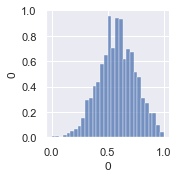

In [28]:
sns.pairplot(data_transfomed_scaled)

In [29]:
plt.subplots(figsize=(15,5))
matrix = np.triu(data_transfomed_scaled.corr())
sns_plot = sns.heatmap(data_transfomed_scaled.corr(), annot=True, mask=matrix)
fig = sns_plot.get_figure()
fig.savefig("transfomed_scaled_corr_matrix.jpg")
plt.clf()

<Figure size 1080x360 with 0 Axes>

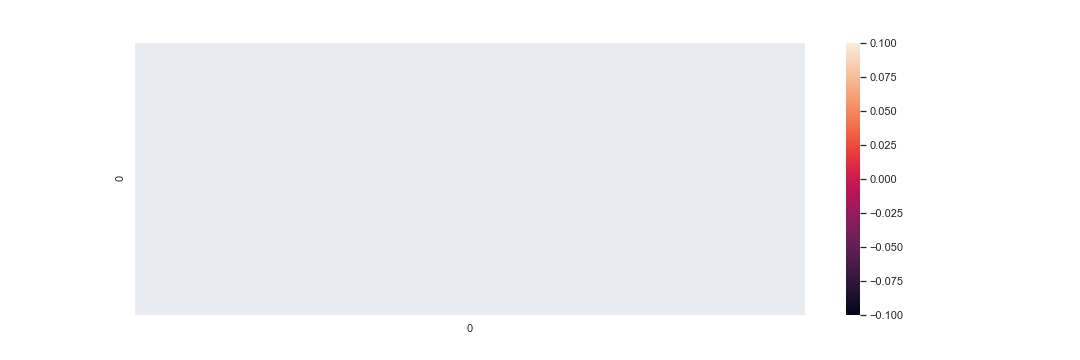

In [30]:
Image(filename='transfomed_scaled_corr_matrix.jpg')

### Train Test Split

In [31]:
data.shape

(2474, 6)

In [32]:
data_transfomed_scaled[0]

date
2014-01-01   0.859
2014-01-02   0.932
2014-01-03   0.957
2014-01-04   0.898
2014-01-05   0.853
              ... 
2020-12-28   0.540
2020-12-29   0.501
2020-12-30   0.674
2020-12-31   0.722
2021-01-01   0.806
Name: 0, Length: 2474, dtype: float64

In [33]:
train_X, train_y = train_test_split(data_transfomed_scaled, test_size=0.01, shuffle=False)
#train_X, train_y = train_test_split(data_transfomed_scaled, test_size=0.01, shuffle=False)

In [34]:
train_X = train_X.values.reshape((train_X.values.shape[0], 1, 1))

In [35]:
train_X.shape

(2449, 1, 1)

In [36]:
#train_y = train_y.values.reshape((train_y.values.shape[0], 1, 1))

In [37]:
train_y.shape

(25, 1)

# 4. RNN & LSTM

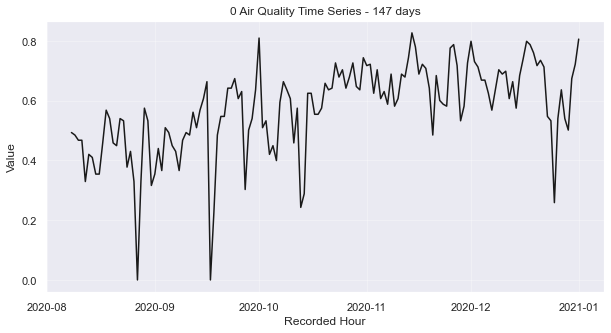

In [38]:
plot_n_last_days(data_transfomed_scaled, 0, 3*49)

In [39]:
data_transfomed_scaled.shape

(2474, 1)

### range of samples

In [40]:
series_days = 3*49
input_days = 14
test_days = 28

train_X, test_X_init, train_y, test_y = get_train_test_data(data_transfomed_scaled, 0, series_days, input_days, test_days)

In [41]:
train_X[0]

array([[0.49321469],
       [0.48482891],
       [0.46746992],
       [0.46746992],
       [0.32926452],
       [0.42017238],
       [0.40994842],
       [0.35415048],
       [0.35415048],
       [0.45847789],
       [0.56809518],
       [0.53991945],
       [0.45847789],
       [0.44926381]])

In [42]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (35, 14, 1)
Training output shape: (35,)
Test input shape: (14,)
Test output shape: (14,)


### RNN

In [43]:
#model = fit_SimpleRNN(train_X, train_y, cell_units=100, epochs=100)
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=100)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 30)                960       
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [45]:
def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_days)  #predict range is going to be from end of X_init to length of test_days
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

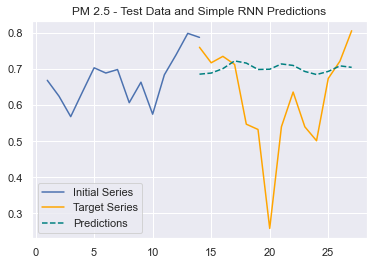

In [46]:
predict_and_plot(test_X_init, test_y, model, 'PM 2.5 - Test Data and Simple RNN Predictions')

In [47]:
#train_X.shape

In [48]:
#train_y.shape

### LSTM

In [49]:
model = fit_LSTM(train_X, train_y, cell_units=70, epochs=1000)

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 70)                20160     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


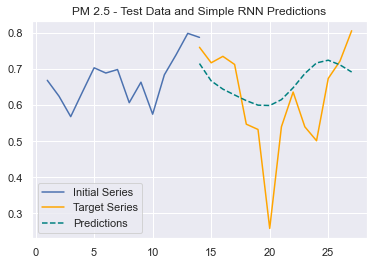

In [51]:
predict_and_plot(test_X_init, test_y, model, 'PM 2.5 - Test Data and Simple RNN Predictions')

In [52]:
#train_X.shape

In [53]:
#train_y

In [54]:
#train_y.reshape(-1, 1)

In [55]:
#test_y

### Invers values

In [56]:
train_y_inverse = mms.inverse_transform(train_y.reshape(-1, 1))
train_y_inverse = np.expm1(train_y_inverse)
#train_y_inverse

In [57]:
test_y_inverse = mms.inverse_transform(test_y.reshape(-1, 1))
test_y_inverse = np.expm1(test_y_inverse)
#test_y_inverse

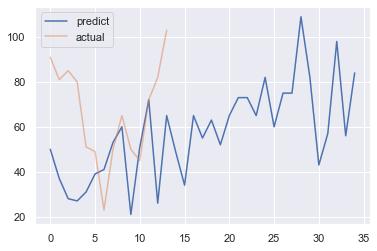

In [58]:
plt.plot(train_y_inverse, label='predict')
plt.plot(test_y_inverse, label='actual', alpha=0.5)
plt.legend()
plt.show()